In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [9]:
import os

os.chdir(r"C:\Users\jakes\OneDrive\Documents\staffing-forecast-optimization\data")

In [11]:
os.getcwd()

'C:\\Users\\jakes\\OneDrive\\Documents\\staffing-forecast-optimization\\data'

In [35]:
df_hourly = pd.read_csv("hour.csv")
df_daily = pd.read_csv("day.csv")

In [37]:
print(df_hourly.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [39]:
print(df_daily.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [41]:
day_map = {0: 'Sunday', 
           1: 'Monday', 
           2: 'Tuesday', 
           3: 'Wednesday', 
           4: 'Thursday', 
           5: 'Friday',
           6: 'Saturday'}
df_daily['day_name'] = df_daily['weekday'].map(day_map)

In [43]:
print(df_daily.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt   day_name  
0   985   Saturday  
1   801     Sunday  
2  1349     Monday  
3 

In [47]:
# Totals by weekday
weekday_totals = df_daily.groupby('day_name')['cnt'].sum()

In [49]:
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_totals = weekday_totals[weekday_order]

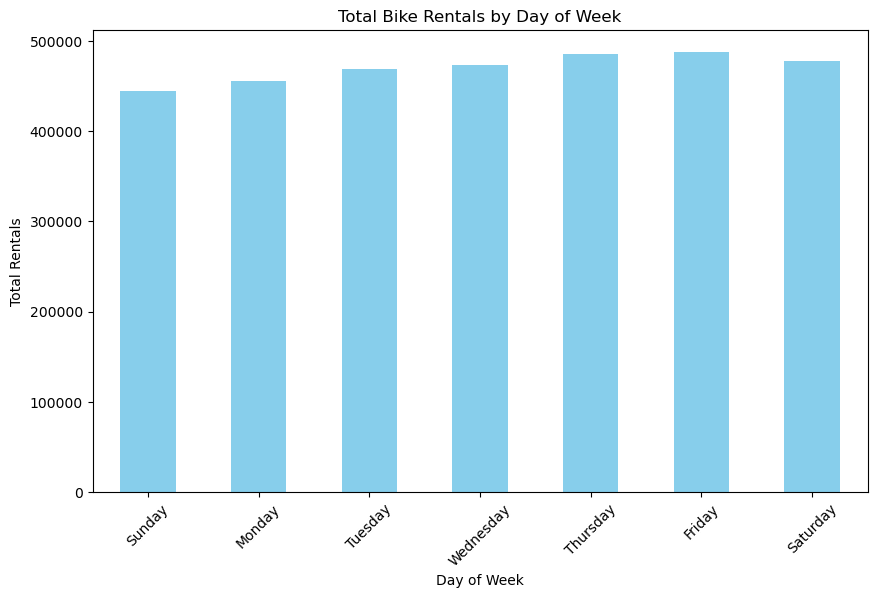

In [51]:
plt.figure(figsize = (10,6))
weekday_totals.plot(kind='bar', color = 'skyblue')
plt.title("Total Bike Rentals by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Rentals")
plt.xticks(rotation=45)
plt.show()

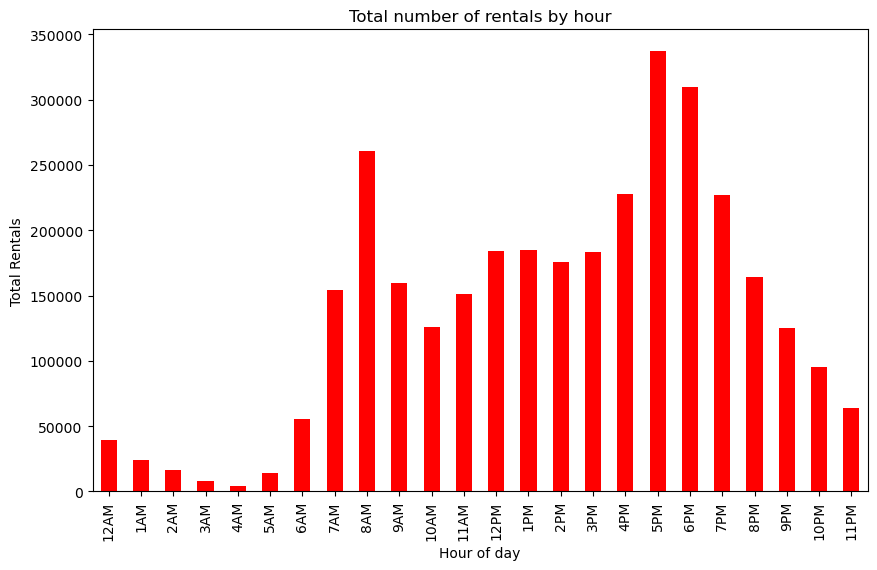

In [63]:
# Total rentals by hour of day

hourly_totals = df_hourly.groupby('hr')['cnt'].sum()
plt.figure(figsize = (10,6))
hourly_totals.plot(kind = 'bar', color = 'red')
plt.title("Total number of rentals by hour")
plt.xlabel("Hour of day")
plt.ylabel("Total Rentals")

hour_labels = [f"{h%12 if h%12 !=0 else 12}{'AM' if h<12 else 'PM'}" for h in range(24)]

plt.xticks(hourly_totals.index, hour_labels)
plt.show()

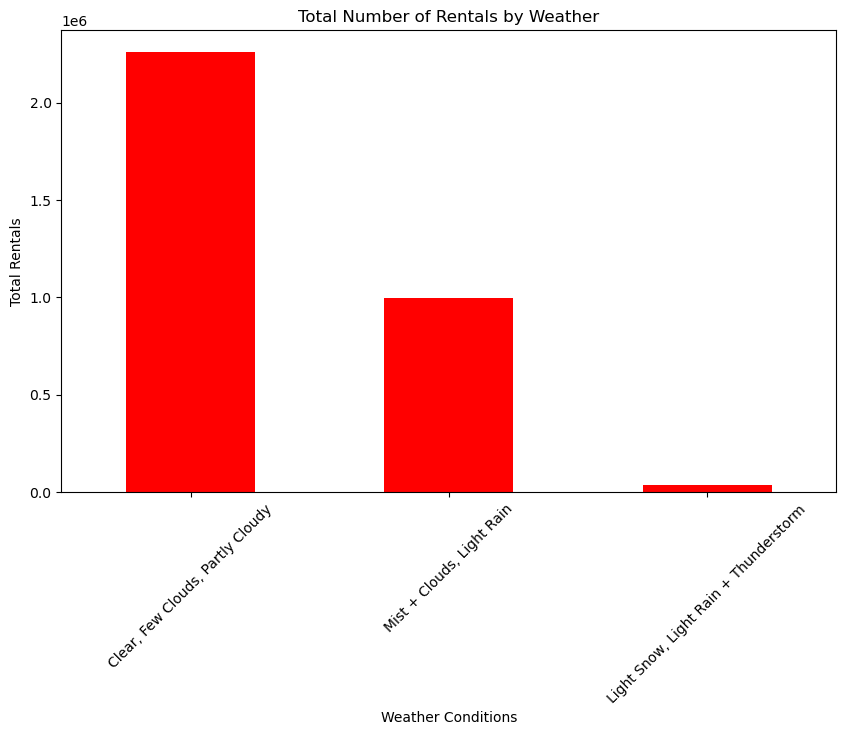

In [85]:
# Seeing total rentals by weather
# NOTE THERE IS NO RENTALS WHEN WEATHERSIT IS 4 THEREFORE WAS VOIDED FROM CHART
weathersit_map = {1:'Clear, Few Clouds, Partly Cloudy',
                  2: 'Mist + Clouds, Light Rain',
                  3: 'Light Snow, Light Rain + Thunderstorm',
                  }
df_daily['weather_conditions'] = df_daily['weathersit'].map(weathersit_map)
weather_order = ['Clear, Few Clouds, Partly Cloudy',
                 'Mist + Clouds, Light Rain',
                 'Light Snow, Light Rain + Thunderstorm',
                 ]
weather_totals = df_daily.groupby('weather_conditions')['cnt'].sum()
weather_totals = weather_totals[weather_order]

plt.figure(figsize=(10,6))
weather_totals.plot(kind = 'bar', color = 'red')
plt.title("Total Number of Rentals by Weather")
plt.xlabel("Weather Conditions")
plt.ylabel("Total Rentals")
plt.xticks(rotation = 45)
plt.show()

In [83]:
# NOTE FROM PREVIOUS CELL SHOWN IN THIS CELL
thunderstorm_total = df_daily[df_daily['weathersit'] == 4]['cnt'].sum()
print(thunderstorm_total)

0


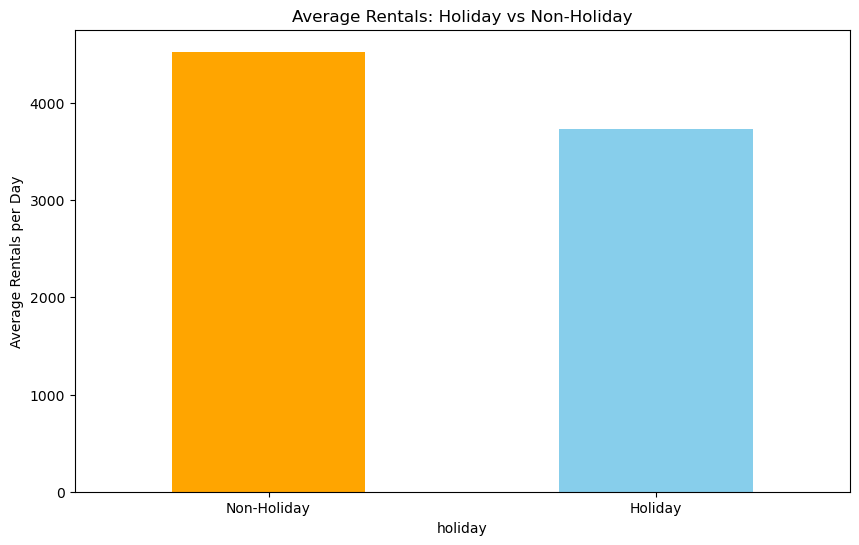

In [93]:
# Plot comparing holidays to normal days with a unit number of days so holidays & normal days have same total number of days
# Average on holiday vs average on non holiday
holiday_totals = df_daily.groupby('holiday')['cnt'].sum()
holiday_days = df_daily['holiday'].value_counts().sort_index()
holiday_avg = holiday_totals / holiday_days


plt.figure(figsize = (10,6))
holiday_avg.plot(kind = 'bar', color = ['orange', 'skyblue'])
plt.xticks([0,1],['Non-Holiday', 'Holiday'], rotation=0)
plt.ylabel("Average Rentals per Day")
plt.title("Average Rentals: Holiday vs Non-Holiday")
plt.show()


In [95]:
print(df_daily.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt   day_name                weather_conditions  
0   985   Saturday         Mist

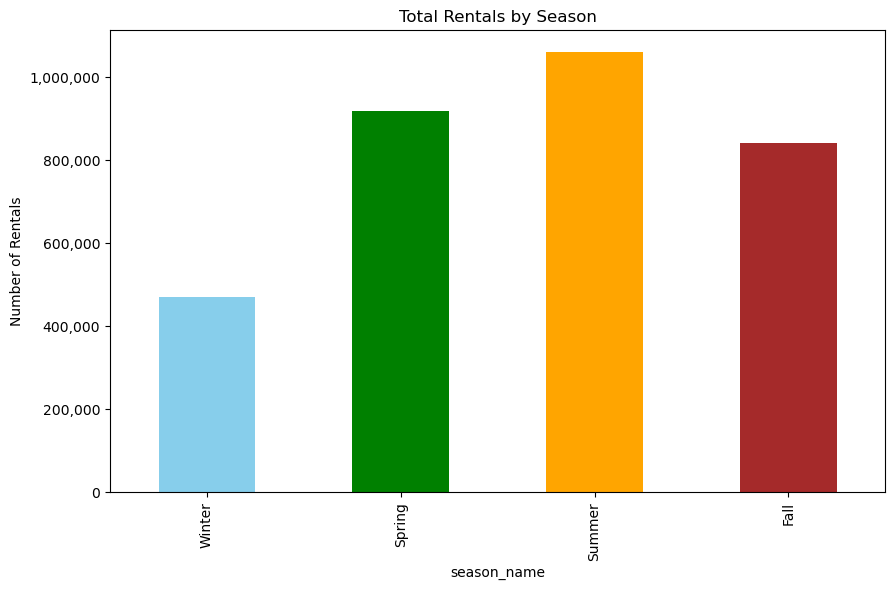

In [117]:
# Plotting by season
season_map = {1: 'Winter',
              2: 'Spring',
              3: 'Summer',
              4: 'Fall'}
df_daily['season_name'] = df_daily['season'].map(season_map)
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_totals = df_daily.groupby('season_name')['cnt'].sum()
season_totals = season_totals[season_order]


plt.figure(figsize=(10,6))
ax = season_totals.plot(kind = 'bar', color = ['skyblue','green','orange','brown'])
plt.xticks([0,1,2,3], ['Winter','Spring','Summer','Fall'])
plt.ylabel("Number of Rentals")
plt.title("Total Rentals by Season")

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.show()
